In [1245]:
from IPython.display import Image, display
from IPython.core.display import HTML

# Resim URL'si
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7ltoZT1furs24vWMk_3cKdicA5rIXxpjo_A&usqp=CAU'

# Orta boyut belirlemek için istediğiniz genişlik ve yükseklik değerleri
frame_width = 500
frame_height = 500

# HTML ile resmin genişlik ve yükseklik değerlerini ayarlayarak resmi ortalamak
image_tag = f'<img src="{image_url}" style="width:{frame_width}px; height:{frame_height}px; display: block; margin: 0 auto;">'

# Resmi göstermek
display(HTML(image_tag))

# Introduction
We are working with a dataset that contains information about Airbnb listings in the US. Our goal is to predict the price of a stay in these listings. The dataset consists of 74411 listings and 29 columns. One of the columns, log_price, is the target variable that we are trying to predict

<font color = 'yellow'>
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
        * [Target Review](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Missing Value](#7)
    * [Find Missing Value](#8)
    * [Fill Missing Value](#9)
    
1. [ Outlier Detection](#10)

1. [Visualization](#11)
    * [Correlation Between log_price--accommodates--bathrooms--number_of_reviews--review_scores_rating--bedroom--beds](#12)
    * [accommodates -- log_price](#13)
    * [bathrooms -- log_price](#14)
    * [number_of_reviews -- log_price](#15)
    * [review_scores_rating -- log_price](#16)
    * [bedroom -- log_price](#17)
    * [beds -- log_price](#18)
    
1. [Feature Engineering](#21)
    * [Propetty Type](#22)
    * [Room Type](#23)
    * [Amenities](#24)
    * [Accomodates](#25)
    * [Bathrooms](#26)
    * [Bed Type](#27)
    * [Cleaning Fee- Host has Profile Picture - Host Identity verified - Instant Bookable](#28)
    * [City](#28)
    * [Description](#28)
    * [First Review](#28)
    * [Host Response Rate](#28)
    * [Host Since](#28)
    * [Last Review](#28)
    * [Latitude-Longitude](#28)
    * [Name](#28)
    * [Neighbourhood](#28)
    * [Review Scores Rating](#28)
    * [Thumbnail URL](#28)
    * [Zipcode](#28)
    * [Bedrooms](#28)
    * [Beds](#28)

1. [Modeling](#29)

    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32) 
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [1246]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns
import re

from scipy import stats
import statsmodels.api as sm


from collections import Counter

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

ERROR! Session/line number was not unique in database. History logging moved to new session 230


C:\Users\karakurt\AppData\Local\Temp\ipykernel_10600\3886533607.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


1. <a id = "1"></a><br>
# Load and Check Data

In [1247]:
cwd = os.getcwd()  # your current working directory (cwd)
files = os.listdir(cwd)  # This will Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\karakurt\\Documents\\GitHub\\ML_Project_Group_B': ['.git', 'Column_description.xlsx', 'Feature_Engineering.ipynb', 'Main.ipynb', 'Missing_Values.ipynb', 'modelling.ipynb', 'Outliers.ipynb', 'README.md', 'train.csv', 'usneighborhoods.csv', 'Visualization.ipynb']


In [1248]:
df_original = pd.read_csv('train.csv')
df = df_original.copy()

2. <a id = "2"></a><br>
# Variable Description


1. Id: It can be considered as a transaction registration number.

2. log_price: Price per night for rental. (TARGET)

3. property_type: Type of property to be rented.('Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel''Castle' 'Cabin' 'Treehouse'...)

4. room_type: The type of room to be rented. ('Entire home/apt' 'Private room' 'Shared room')

5. amenities: The essential items a guest expects to have a comfortable stay.("Wireless Internet","Air conditioning",Kitchen,"Free parking on premises","Smoke detector","Carbon monoxide detector","First aid kit","Safety card"...)

6. accommodates: Number of guests the rental can host. 

7. bathrooms:The number of bathroom found in the accommodation

8. bed_type: The type of bed found in the accommodation.(Real Bed, Futon, Pull-out Sofa, Couch, Airbed) 

9. cancellation_policy: Determines the amount of refund a guest will receive if they cancel their reservation. (strict, moderate, flexible, super_strict_30, super_strict_60)

10. cleaning_fee: Fee for cleaning the area you are staying in. (True, False)

11. city: Cities where the facility is located.(NYC, SF, DC, LA, Chicago, Boston)  

12. description: Detailed description of the space, usually including the room's features, amenities, location, and any special considerations or rules guests should be aware of.

13. first_review: Date of first feedback a guest leaves after staying at a particular property.

14. host_has_profile_pic: Whether the host has a profile picture (True, False)

15. host_identity_verified: Whether the host's identity has been confirmed. (True, False)

16. host_response_rate: Percentage of replies to host messages within a given time frame.

17. host_since: The date a host joined Airbnb and started using their property on the platform.

18. instant_bookable: Allows guests to book listings without having to wait for host's approval. (True, False)

19. last_review: The date when a guest last left feedback about their stay at that property.

20. latitude: Latitude value of the location of the facility.

21. longitude: Longtitude value of the location of the facility.

22. name: A descriptive or catchy headline that hosts use to attract guests.

23. neighbourhood: The specific district or district in which a property is located.

24. number_of_reviews: Represents the total number of reviews posted by guests staying at the property.

25. review_scores_rating: Value that represents the overall rating or evaluation given by guests to a host or accommodation. 

26. thumbnail_url: A web link address that points to a thumbnail image of a record.

27. zipcode: Zip code of the place where the accommodation is located

28. bedrooms: The number of separate bedrooms available to guests.

29. beds: The number of beds included in the rental

3. <a id = "3"></a><br>
# Basic Data Analysis


In [1249]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [1250]:
#pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [1251]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [1252]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [1253]:
# Check Unique, Missing and Duplicated values

summary = pd.DataFrame(index=df.columns)
summary["Unique"] = df.nunique().values
summary["Duplicated"] = df.duplicated().sum()
summary["Missing"] = df.isnull().sum()
summary["Missing Percentage"] = (df.isnull().sum() / len(df)) * 100
summary["Types"] = df.dtypes
summary_styled = summary.style.background_gradient()
    
summary_styled

,Unique,Duplicated,Missing,Missing Percentage,Types
id,74111,0,0,0.000000,int64
log_price,767,0,0,0.000000,float64
property_type,35,0,0,0.000000,object
room_type,3,0,0,0.000000,object
amenities,67122,0,0,0.000000,object
accommodates,16,0,0,0.000000,int64
bathrooms,17,0,200,0.269865,float64
bed_type,5,0,0,0.000000,object
cancellation_policy,5,0,0,0.000000,object
cleaning_fee,2,0,0,0.000000,bool


* [Target Review](#3)

In [1254]:
target = df['log_price']
df['price'] = np.exp(target)
df['price']

0        150.0
1        169.0
2        145.0
3        750.0
4        115.0
         ...  
74106    100.0
74107    155.0
74108    185.0
74109    195.0
74110    128.0
Name: price, Length: 74111, dtype: float64

 Using the np.exc() function, the inverse of the logarithmic transformation is applied for the log_price column.
Purpose: to reach the original target and examine it

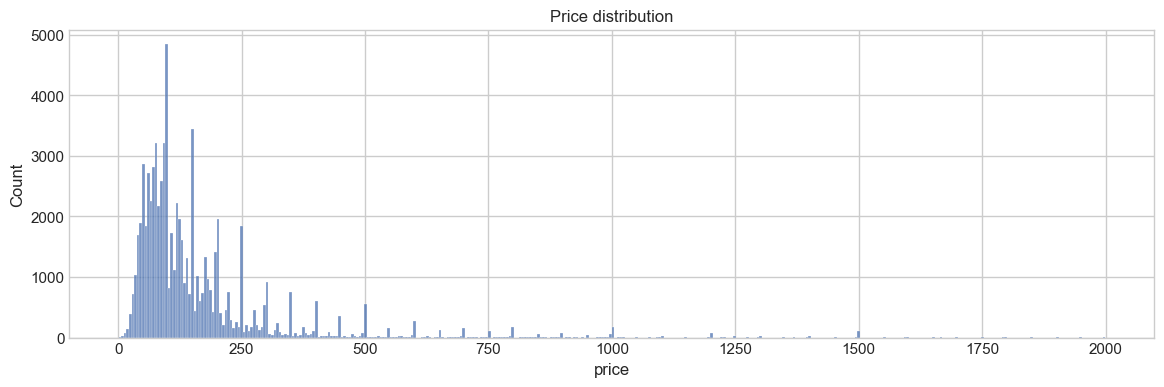

In [1255]:
# histogram plot of the price column
plt.figure(figsize = (14, 4))
sns.histplot(df["price"])
plt.title('Price distribution')
plt.show()

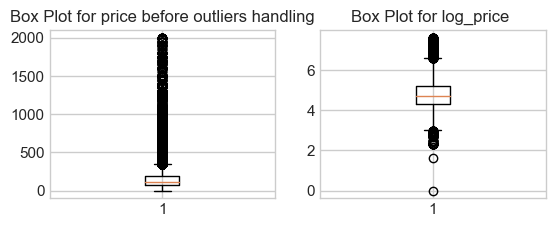

In [1256]:
# Displaying the price column with a box plot
plt.figure()
plt.subplot(2, 2, 1)
plt.boxplot(df['price'])
plt.title(f"Box Plot for {'price'} before outliers handling")

plt.subplot(2, 2, 2)
plt.boxplot(df['log_price'])
plt.title(f"Box Plot for {'log_price'} ")

plt.show()

In [1257]:
# Calculating outliers with Z score
z_scores = stats.zscore(df['price'])
outlier_threshold = 3
outliers_price = df['price'][abs(z_scores) > outlier_threshold]
outliers_price

3         750.0
24       1050.0
52        750.0
62       1000.0
105       700.0
          ...  
73939     838.0
73953     925.0
73957     800.0
74031    1000.0
74081    1000.0
Name: price, Length: 1593, dtype: float64

In [1258]:
## Normality Test -price-
# Shapiro-Wilk test
shapiro_stat, shapiro_pvalue = stats.shapiro(df['price'])
shapiro_normal = shapiro_pvalue > 0.05
print(f"Shapiro-Wilk test - Normal: {shapiro_normal}")

Shapiro-Wilk test - Normal: False


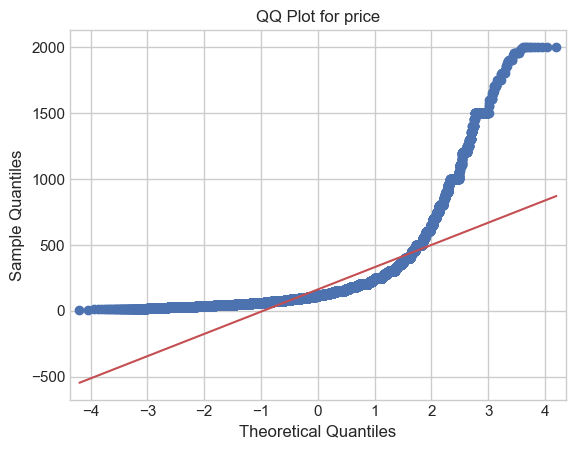

In [1259]:
import statsmodels.api as sm
# Perform normality check using QQ plot
# Create QQ plot
sm.qqplot(df['price'], line='s')
plt.title(f"QQ Plot for {'price'}")
plt.show()

## Transformation price

!!
clarification: Outliers of the price column have not been handled yet. but we wanted to see the transformation of the column. will be rearranged after outliers are decided


Text(0.5, 1.0, 'power_price in Power Transformation')

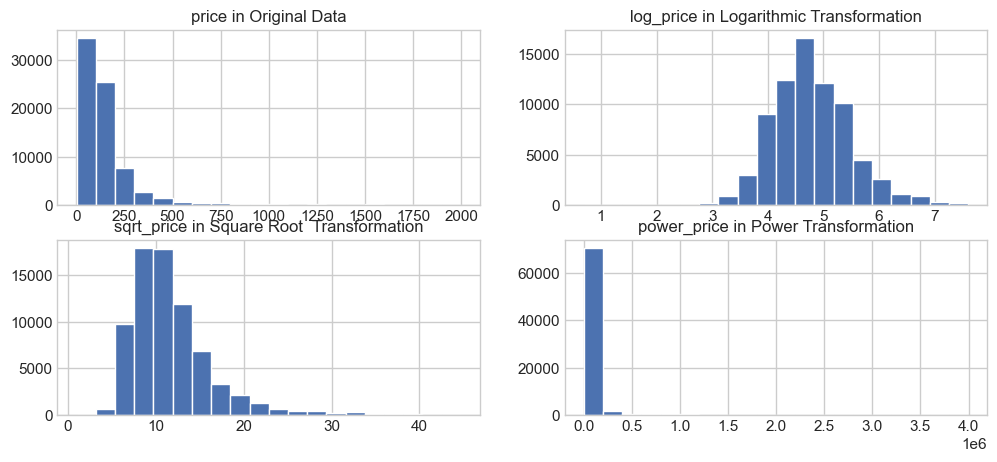

In [1260]:
log_price = df['price']
log_transformed_df = np.log1p(log_price)

sqrt_price = df['price']
sqrt_transformed_df = np.sqrt(sqrt_price)

power_price = df['price']
power_transformed_df = np.power(power_price, 2)

plt.figure(figsize=(12, 5))
#log transformation
plt.subplot(2, 2, 1)
plt.hist(df['price'], bins=20)
plt.title('price in Original Data')
plt.subplot(2, 2, 2)
plt.hist(log_transformed_df, bins=20)
plt.title(f'log_price in Logarithmic Transformation')
#Square Root Transformation
plt.subplot(2, 2, 3)
plt.hist(sqrt_transformed_df, bins=20)
plt.title(f'sqrt_price in Square Root  Transformation')
#Power Transformation
plt.subplot(2, 2, 4)
plt.hist(power_transformed_df, bins=20)
plt.title(f'power_price in Power Transformation')

* [Categorical Variable](#4)

In [1261]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_columns

['property_type',
 'room_type',
 'amenities',
 'bed_type',
 'cancellation_policy',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

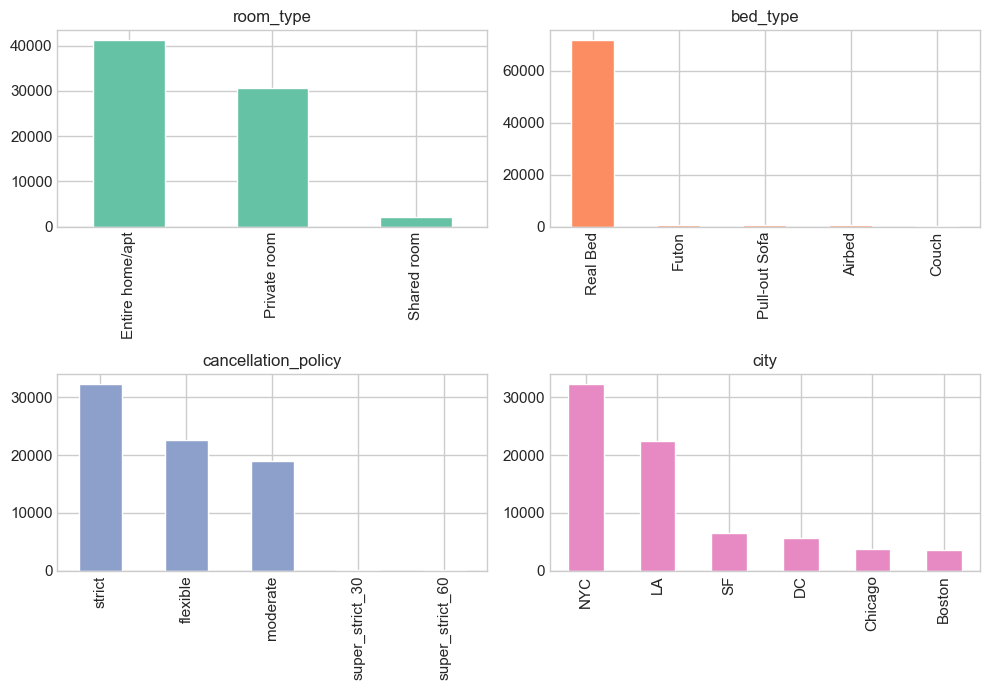

In [1262]:
plt.figure(figsize=(10, 7))

columns = ['room_type', 'bed_type', 'cancellation_policy', 'city']
colors = sns.color_palette('Set2', len(columns)) 

for i, column in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    df[column].value_counts().plot(kind='bar', title=column, color=colors[i])
    plt.xlabel('')

plt.tight_layout()
plt.show()

* [Numerical Variable](#5)

In [1263]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'price'],
      dtype='object')

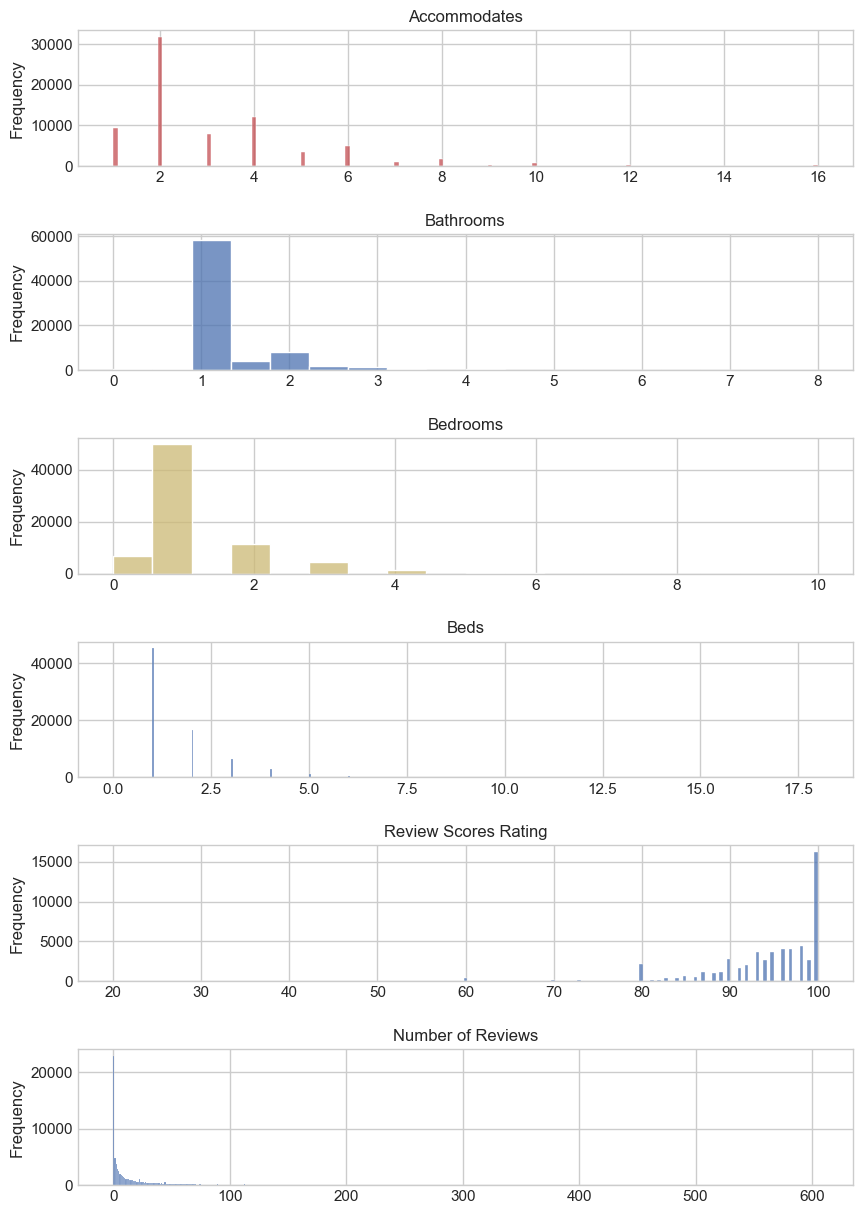

In [1264]:
fig, ax = plt.subplots(6, 1, figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)

columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']
colors = ['r', 'b', 'y', 'b', 'b', 'b']
titles = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Review Scores Rating', 'Number of Reviews']

for i in range(len(columns)):
    sns.histplot(df[columns[i]], color=colors[i], ax=ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frequency')

plt.show()

4. <a id = "4"></a><br>
# Missing Value

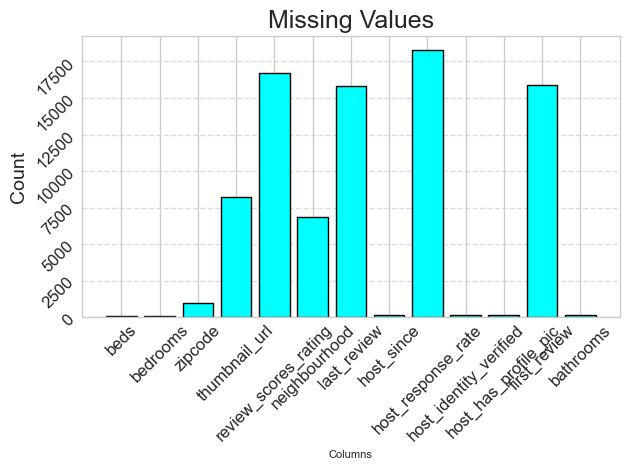

In [1265]:
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Create a vertical bar chart to show missing values
plt.bar(missing_values.index, missing_values.values, color='cyan', edgecolor='black')

# Customize the chart
plt.title('Missing Values', fontsize=18)
plt.xlabel('Columns', fontsize=8)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12, rotation=45)  # Rotate the x-axis labels for better visibility
plt.gca().invert_xaxis()  # Display bars from right to left
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add vertical grid lines

# Show the plot
plt.tight_layout()
plt.show()

* bathrooms

In [1266]:
filtered_bath = df[(df['description'].str.contains('bathroom', na=False)) & (df['bathrooms'].isna())]

In [1267]:
def convert_bathroom_description(description):
    #if ('one bathroom') or ('1 bathroom') or ('1full') or ('full') or ('shared') or ('Shared') or ('Private') or ('SHARED') or ('attractive') in description.lower():
    #    return 1
    if ("two bathrooms") or  ('2 bathrooms') in description.lower():
        return 2
    elif '3 bathrooms' in description.lower():
        return 3
    elif '4 bathrooms' in description.lower():
        return 4 
    elif ('one bathroom') or ('1 bathroom') or ('1full') or ('full') or ('shared') or ('Shared') or ('Private') or ('SHARED') or ('attractive') in description.lower():
        return 1
    else:
        #return 1
        return None

# Print the results from the "filtered_bath" DataFrame as numeric values in the "bathrooms" column
df.loc[filtered_bath.index, 'bathrooms'] = filtered_bath['description'].apply(convert_bathroom_description)

In [1268]:
df['bathrooms'] = df['bathrooms'].fillna(1)

* bedrooms

In [1269]:
import numpy as np

keywords = ['one bedroom', 'bedroom', 'two bedrooms', 'bedrooms']

# Filter rows where the 'description' column contains the keywords and the 'bedrooms' column is NaN
filtered_data = df[(df['description'].str.contains('|'.join(keywords), na=False)) & (df['bedrooms'].isna())]

# Fill the 'bedrooms' column with 1 for specific 'id' values
ids = filtered_data['id'].tolist()  # Get the id values from the filtered dataset
df.loc[df['id'].isin(ids), 'bedrooms'] = df.loc[df['id'].isin(ids), 'bedrooms'].fillna(1)

# Get the number of observations in the filtered dataset
num_rows = len(filtered_data)
print("Number of observations in the filtered dataset:", num_rows)

Number of observations in the filtered dataset: 8


The purpose of this code is to filter rows that have specific keywords in the 'description' column and empty 'bedrooms' values. It then updates the 'bedrooms' column for these filtered rows to 1 and prints the number of observations in the filtered dataset.

In [1270]:
df["bedrooms"] = df['bedrooms'].fillna((df["bedrooms"].mean()))

* thumbnail_url

In [1271]:
# We fill the filled values with 1 and the empty values with 0 in the thumbnail_url column.
df['thumbnail_url'] = df['thumbnail_url'].apply(lambda x: 1 if pd.notna(x) else 0)

* zipcode

In [1272]:
df['zipcode'] = pd.to_numeric(df['zipcode'],errors='coerce')

In [1273]:
correlation = df['log_price'].corr(df['zipcode'])
print("Correlation:", correlation)

Correlation: 0.03402257978807774


In [1274]:
#pip install uszipcode    # installing Library to find zip code from latitude and longitude information using us zip code
from uszipcode import SearchEngine

search = SearchEngine()
zipcodes = []
for index, row in df.iterrows():
    latitude = row['latitude']  # Latitude 
    longitude = row['longitude']  # Longitude 

    result = search.by_coordinates(latitude, longitude)
    if result:
        zipcode = result[0].zipcode
        zipcodes.append(zipcode)
    else:
        zipcodes.append(None)  # None if postal code not found or incorrect

df['Zipcode'] = zipcodes  # Adds a new Zipcode column

In [1275]:
df[['Zipcode','zipcode']].head(5)   #comparing two columns for first observation

,Zipcode,zipcode
0,11201,11201.0
1,10019,10019.0
2,10037,10027.0
3,94115,94117.0
4,20010,20009.0


In [1276]:
filtered_zip =df[df['Zipcode'].isna()][['neighbourhood','city','latitude','zipcode']]
print(filtered_zip)

      neighbourhood city   latitude  zipcode
2461            NaN   LA  33.343574  90704.0
4317            NaN   LA  33.339327  90704.0
18396           NaN   LA  33.343624  90704.0
26402           NaN   LA  33.343287  90704.0
27138           NaN   LA  33.354491  90704.0
27310           NaN   LA  33.353834  90704.0
31296           NaN   LA  33.345148  90704.0
42232           NaN   LA  33.338905  90704.0
44131           NaN   LA  33.340521  90704.0
46773           NaN   LA  33.352373  90704.0
59902           NaN   LA  33.339007  90704.0
63200           NaN   LA  33.339002  90704.0
64969           NaN   LA  33.340916  90704.0
69934           NaN   LA  33.343011  90704.0


In [1277]:
df = df.drop(filtered_zip.index)

* Neighbourhood

In [1339]:
#df['neighbourhood']=df_original['neighbourhood'].copy()
df['city']=df_original['city'].copy()

from uszipcode import SearchEngine
from geopy.geocoders import Nominatim
# taking zipcodes
zipcodes = df['Zipcode']
#print(zipcodes)

The method of imputing missing values is used. By using the values in the City and Zip code columns, the neighborhood column has been imputed and the number of missing values has been reduced to 1864.

In [1340]:

#Fill in missing values by matching `city` and `Zipcode` columns
df['neighbourhood'] = df.apply(lambda row: df.loc[(df['city'] == row['city']) & (df['Zipcode'] == row['Zipcode']), 'neighbourhood'].values[0] if pd.isnull(row['neighbourhood']) else row['neighbourhood'], axis=1)

# printing results
#print(df[['neighbourhood', 'Zipcode', 'city']])


* Neihgbour sütununu başka data setinden doldurma

In [1341]:
# usneighborhoods datasını yükleyin (varsayılan olarak verilerinizi bir CSV dosyasından yüklemeyi gösteriyorum)
usneighborhoods_df = pd.read_csv('usneighborhoods.csv')

# 1. airbnb datasındaki neighbourhood sütunundaki boş değerleri bulun
missing_neighbourhoods = df[df['neighbourhood'].isnull()]

# 2. ve 3. Bulunan boş değerlerin zipcode'lerini kullanarak usneighborhoods datasında arayın
for index, row in missing_neighbourhoods.iterrows():
    zipcode = row['zipcode']
    matching_neighbour = usneighborhoods_df[usneighborhoods_df['zipcode'] == zipcode]['neighbor'].values
    
    # 4. Eğer eşleşen bir neighbor bulunursa, airbnb datasındaki boş neighbour sütununu doldurun
    if len(matching_neighbour) > 0:
        df.at[index, 'neighbourhood'] = matching_neighbour[0]

for index, row in missing_neighbourhoods.iterrows():
    zipcode = row['Zipcode']
    matching_neighbour = usneighborhoods_df[usneighborhoods_df['zipcode'] == zipcode]['neighbor'].values
    
    # 4. Eğer eşleşen bir neighbor bulunursa, airbnb datasındaki boş neighbour sütununu doldurun
    if len(matching_neighbour) > 0:
        df.at[index, 'neighbourhood'] = matching_neighbour[0]

# Sonuçları gösterin (sadece ilgili sütunları göstereceğiz)
print(df[['neighbourhood', 'Zipcode', 'latitude', 'longitude']])


          neighbourhood Zipcode   latitude   longitude
0      Brooklyn Heights   11201  40.696524  -73.991617
1        Hell's Kitchen   11201  40.692759  -73.996566
2                Harlem   11201  40.695112  -73.993405
3          Lower Haight   11201  40.692575  -73.993039
4      Columbia Heights   11201  40.693339  -73.999362
...                 ...     ...        ...         ...
72158          Kips Bay   10309  40.537553  -74.216645
72159       Fort Greene   90603  33.930022 -117.974940
72160           Gowanus   91006  34.121086 -117.990023
72161    West Hollywood   90274  33.771027 -118.359503
72162  West Los Angeles   10306  40.580231  -74.107252

[72163 rows x 4 columns]


In [1342]:
df=df.dropna(subset=['neighbourhood'])

* host_response_rate

In [1282]:
df.host_response_rate = df.host_response_rate.apply(lambda x: int(x[:len(x)-1])/100 if isinstance(x,str) else x )
df.host_response_rate = df.host_response_rate.fillna(df.host_response_rate.mean())

* first_review

In [1283]:
def fill_missing_first_review_by_city(df):
    # Convert "host_since" and "first_review" columns to date data type.
    df['host_since'] = pd.to_datetime(df['host_since'])
    df['first_review'] = pd.to_datetime(df['first_review'])
    
    # Get unique cities from the "city" column
    cities = df['city'].unique()
    
    # Iterate over each city
    for city in cities:
        # Filter rows matching the current city
        filtered_df = df[df['city'] == city]
        
        # Calculate the average duration between "first_review" and "host_since" on the filtered_df
        average_duration = (filtered_df['first_review'] - filtered_df['host_since']).mean().days
        
        # Fill missing "first_review" values of rows matching the current city with the average value
        df.loc[(df['city'] == city) & (df['first_review'].isnull()), 'first_review'] = df.loc[(df['city'] == city) & (df['first_review'].isnull()), 'host_since'] + pd.DateOffset(days=average_duration)
    
    return df

# Example usage
df = fill_missing_first_review_by_city(df)


In [1284]:
df['first_review'].isnull().sum()

42

In [1285]:
pd.set_option('display.max_rows', 50)
df[['first_review','last_review']]

,first_review,last_review
0,2016-06-18,2016-07-18
1,2017-08-05,2017-09-23
2,2017-04-30,2017-09-14
3,2017-02-28,NaN
4,2015-05-12,2017-01-22
...,...,...
74106,2014-11-21,NaN
74107,2016-08-15,2017-04-15
74108,2015-01-03,2017-09-10
74109,2019-05-17,NaN


* last_review

In [1286]:
#check with first review 
nan_rows = df[df['first_review'].isnull()]
nan_last_review_count = np.sum(nan_rows['last_review'].isnull())
nan_last_review_count
# We detected that the values that are Nan in the last review are Nan in the first review values.

36

In [1287]:
df.last_review.fillna(method="ffill",inplace=True)

* host_since

In [1288]:
# Filters empty values in column 'host_since'
filtered_since = df[df['host_since'].isnull()]
#last review filters out empty values from the filtered values
filtered_since =  filtered_since[filtered_since['last_review'].isnull()]
# Returns whether the values in the selected properties are empty after 2 filters
selected_columns = filtered_since[['first_review', 'host_has_profile_pic', 'host_identity_verified']]

In [1289]:
#As a result of filtering, we drop these rows because the same row is empty in 9 properties.
df = df.drop(filtered_since.index)

In [1290]:
def fill_missing_host_since_by_city(df):
  
    # Get unique cities from the "city" column
    cities = df['city'].unique()
    
    # Iterate over each city
    for city in cities:
        # Filter rows matching the current city
        filtered_df = df[df['city'] == city]
        
        # Calculate the average duration between "first_review" and "host_since" on the filtered_df
        average_duration = (filtered_df['host_since'] - filtered_df['first_review']).mean().days
        
        # Fill missing "first_review" values of rows matching the current city with the average value
        df.loc[(df['city'] == city) & (df['host_since'].isnull()), 'host_since'] = df.loc[(df['city'] == city) & (df['host_since'].isnull()), 'first_review'] + pd.DateOffset(days=average_duration)
    
    return df

# Example usage
df = fill_missing_host_since_by_city(df)

In [1291]:
df['host_since'].isnull().sum()

42

* review_scores_rating

In [1292]:
# The "number_of_reviews" column values are directly related to the values in the "review_scores_rating" column
filtered_review = df[["number_of_reviews","review_scores_rating"]][df.number_of_reviews == 0]
filtered_review

,number_of_reviews,review_scores_rating
3,0,NaN
12,0,NaN
15,0,NaN
24,0,NaN
31,0,NaN
...,...,...
74083,0,NaN
74089,0,NaN
74095,0,NaN
74106,0,NaN


In [1293]:
# We compared the Nan-valued rows of the "review_scores_rating" column with the 0 values of the "number_of_reviews" column. 
# If the value is 0, we set the Nan value to 0.
zero_reviews_nan_scores = df[(df['number_of_reviews'] == 0) & (df['review_scores_rating'].isnull())]
df.loc[zero_reviews_nan_scores.index, 'review_scores_rating'] = 0

In [1294]:
#filled the remaining missing values with the mean
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)

In [1295]:
df['review_scores_rating'].isnull().sum()

0

* beds

In [1296]:
#The number of beds is directly related to the bedroom and bed_type column.
result = df.loc[df['beds'].isnull(), 'bed_type'].value_counts() # boş olan beds değerlerinin, bed_type değerleri
result

bed_type
Real Bed         122
Pull-out Sofa      2
Name: count, dtype: int64

In [1297]:
## the values of the empty beds, the bedrooms values
result = df.loc[df['beds'].isnull(), 'bedrooms'].value_counts()
result 

bedrooms
1.000000    86
1.265764    27
0.000000     4
2.000000     4
4.000000     2
3.000000     1
Name: count, dtype: int64

In [1298]:
# We filled the empty beds with 1, those whose bedroms value is empty and 1, and those whose bed_type value is Real Bed. 
# We completed the remaining empty values with the value of bedrooms.
df.loc[((df['beds'].isnull()) | (df['beds'] == 0)) & (df['bedrooms'] == 1) & (df['bed_type'] == 'Real Bed'), 'beds'] = 1
df.loc[df['beds'].isnull(), 'beds'] = df['bedrooms']

5. <a id = "5"></a><br>
# Outlier Detection

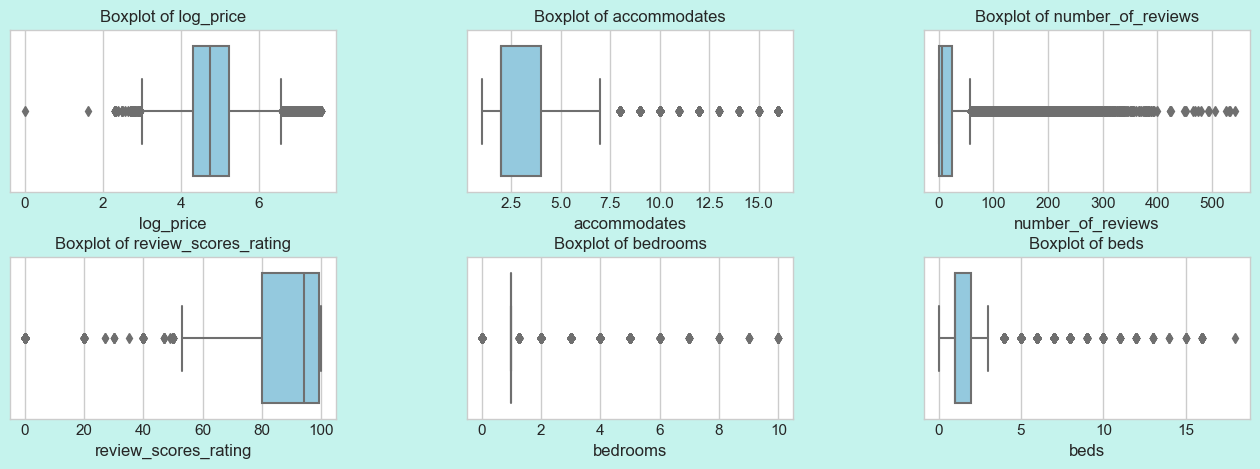

In [1299]:
# Columns where we want to find outliers
outliers_columns = ['log_price', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

fig = plt.figure(facecolor='#C5F3ED', figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Let's loop the columns and draw the boxplot
for num, column_name in enumerate(outliers_columns, start=1):
    ax = fig.add_subplot(3, 3, num)
    sns.boxplot(x=df[column_name], color='skyblue', ax=ax)
    ax.set_title(f"Boxplot of {column_name}")

plt.show()

In [1300]:
def find_column_outliers(df, column_name):
    column = df[column_name]
    Q1 = np.quantile(column, 0.25)
    Q3 = np.quantile(column, 0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    outliers = column[(column < lower_limit) | (column > upper_limit)]
    return outliers

for column_name in outliers_columns:
    outliers = find_column_outliers(df, column_name)
    print(f"Outliers in '{column_name}':")
    print(outliers)
    print("===")

Outliers in 'log_price':
3        6.620073
24       6.956545
52       6.620073
62       6.907755
148      7.150701
           ...   
73939    6.731018
73953    6.829794
73957    6.684612
74031    6.907755
74081    6.907755
Name: log_price, Length: 1484, dtype: float64
===
Outliers in 'accommodates':
19        8
42        8
62        9
104       9
109       9
         ..
74031     8
74032    10
74042     8
74081    16
74102    10
Name: accommodates, Length: 3452, dtype: int64
===
Outliers in 'number_of_reviews':
8        159
10        82
22        73
32       248
36       138
        ... 
74026     76
74037    158
74057     89
74082     60
74110    205
Name: number_of_reviews, Length: 7726, dtype: int64
===
Outliers in 'review_scores_rating':
3         0.0
4        40.0
12        0.0
15        0.0
24        0.0
         ... 
74083     0.0
74089     0.0
74095     0.0
74106     0.0
74109     0.0
Name: review_scores_rating, Length: 15529, dtype: float64
===
Outliers in 'bedrooms':
1       

We tried the IQR (Interquartile Range) Method, Winsorizing Method, Robust Scaling and Capping and Flooring methods, which are the methods of processing outliers on our data. We chose the most suitable IQR (Interquartile Range) Method to better analyze our data.

In [1301]:
# Let's set the lower and upper percentiles to handle outliers
lower_limit = 0.05
upper_limit = 0.95

outliers_columns = ['log_price', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

def handle_outliers(df, column_name, lower_limit, upper_limit):
    column = df[column_name]
    Q1 = column.quantile(lower_limit)
    Q3 = column.quantile(upper_limit)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)

# Deal with outliers
for column_name in outliers_columns:
    handle_outliers(df, column_name, lower_limit, upper_limit)

# show the updated dataframe
print(df)

             id  log_price property_type        room_type   
0       6901257   5.010635     Apartment  Entire home/apt  \
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates   
0      {"Wireless Internet","Air conditioning",Kitche...             3  \
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Ai

accommodates

* Bu kısma alt satırdaki kodun açıklşaması yazılacak. Alttaki kod silinecek

accommadate sutununun outlier analizi:IQR analzi yaptigimizda 3604 adet outlier bulduk .ancak bunlari inceledigimizde cok sayida property_type degeri Loft olan degerle karsilastik.Loft turundeki kiralik mulkler genellikle yatak odasi ya da yatak olmayan ama cok sayida insanin bulusabilecegi mekanlar oldugunu gözlemledik.8,9,....16 gibi degerlerin outlier olamayacagini gözlemledik.Outlier olarak gözuken , Bedroom Sayısı 0 veya 1 Olan, Bed Sayısı 3'ten Küçük ve emlek turu Loft Olmayan degerlerin 110 oldugunu bulduk.Onlarin da description sutunundaki bilgilerini inceledigimizde outlier olmadigini gözlemledik.bu sutunda outlier olmadigina karar verdik


When we conducted an IQR analysis on the 'accommodates' column, we found 3604 outliers. However, upon examining them, we noticed a significant number of properties with the 'Loft' property type. We observed that rental properties of the 'Loft' type are typically spaces where there may not be bedrooms or beds but can accommodate a large number of people. Values like 8, 9, ... 16 should not be considered outliers in this case. We found that there are 110 values that are considered outliers, which have a bedroom count of 0 or 1, bed count less than 3, and property type other than 'Loft'. Upon inspecting their descriptions, we observed that they are not outliers. Therefore, we concluded that there are no outliers in the 'description' column.

bedrooms    &     beds

6. <a id = "5"></a><br>
# Visualization

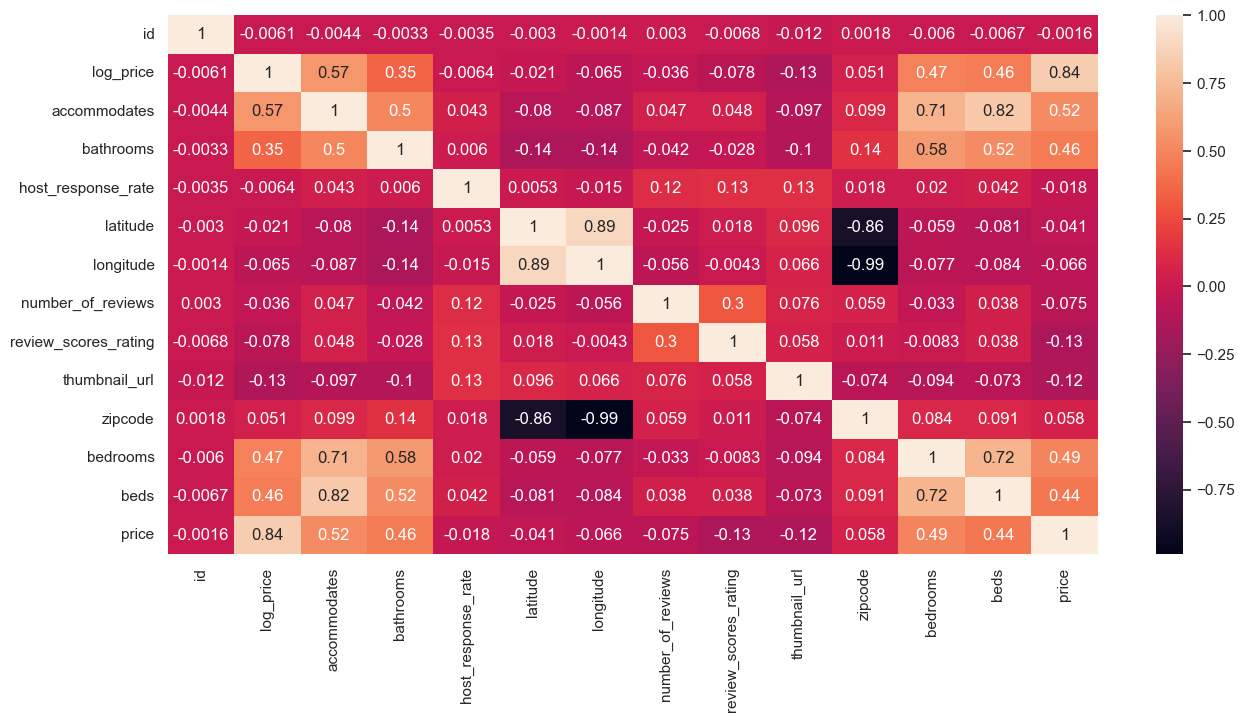

In [1302]:
# Correlation of numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float'])
sns.set(font_scale=1.0)
plt.figure(figsize=(15,7))
sns.heatmap(numerical_columns.corr(), annot=True)
plt.show()

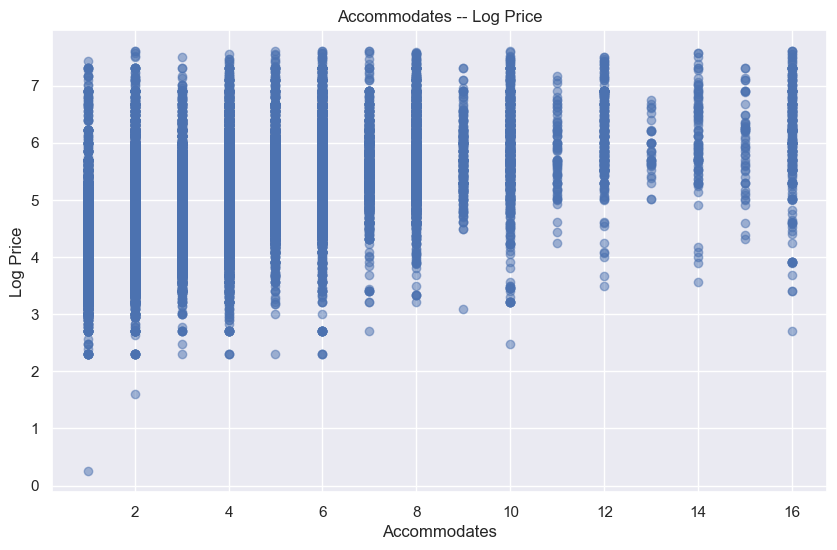

In [1303]:
# Showing the relationship between "accommodates" and "log_price"
plt.figure(figsize=(10, 6))
plt.scatter(df['accommodates'], df['log_price'], alpha=0.5)
plt.xlabel('Accommodates')
plt.ylabel('Log Price')
plt.title('Accommodates -- Log Price')
plt.show()

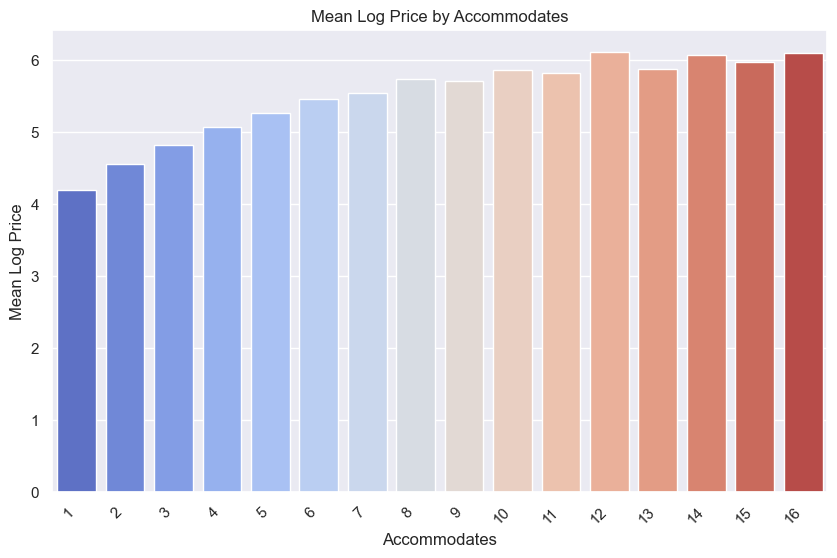

In [1304]:
# Let's divide the "accommodates" column into categorical groups and calculate the "log_price" averages. 
# In this way, we can better see the effect on the price.

grouped_data = df.groupby('accommodates')['log_price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data, palette='coolwarm')
plt.xlabel('Accommodates')
plt.ylabel('Mean Log Price')
plt.title('Mean Log Price by Accommodates')
plt.xticks(rotation=45, ha='right')
plt.show()

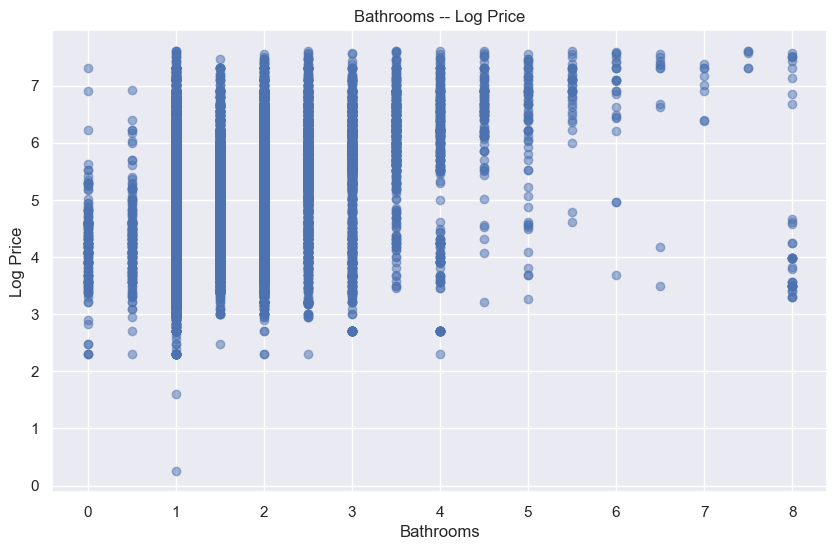

In [1305]:
# Showing the relationship between "bathrooms" and "log_price"
plt.figure(figsize=(10, 6))
plt.scatter(df['bathrooms'], df['log_price'], alpha=0.5)
plt.xlabel('Bathrooms')
plt.ylabel('Log Price')
plt.title('Bathrooms -- Log Price')
plt.show()

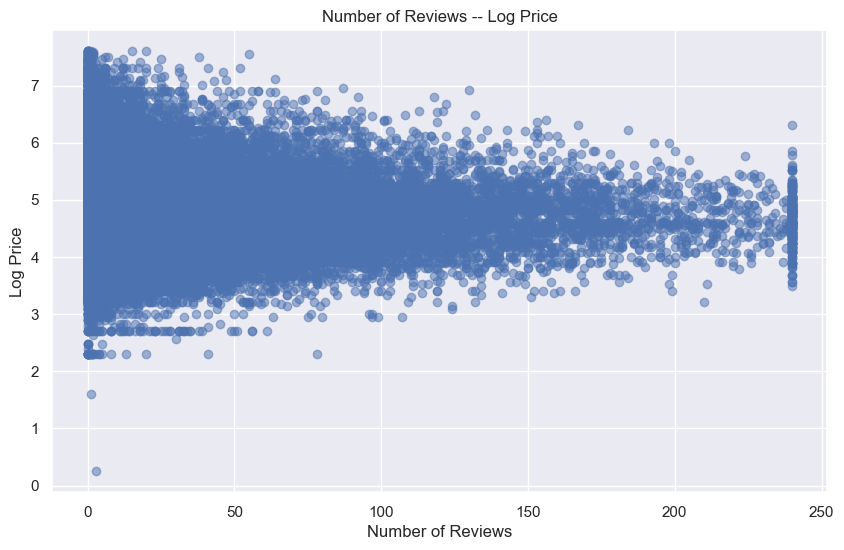

In [1306]:
# Showing the relationship between "number_of_reviews" and "log_price"
plt.figure(figsize=(10, 6))
plt.scatter(df['number_of_reviews'], df['log_price'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.title('Number of Reviews -- Log Price')
plt.show()


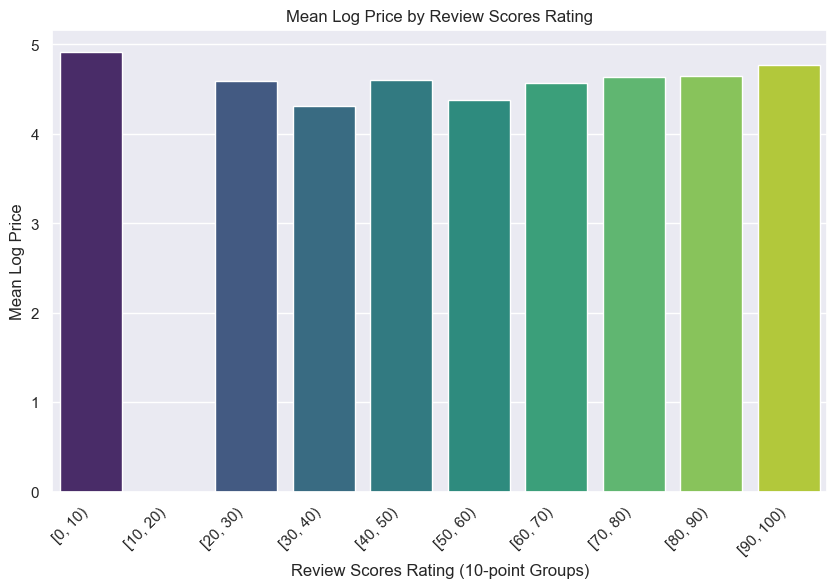

In [1307]:
# Divide the "review_scores_rating" values into 10 groups.Showing the relationship between "review_scores_group" and "log_price"

df['review_scores_group'] = pd.cut(df['review_scores_rating'], bins=range(0, 110, 10), right=False)
grouped_data = df.groupby('review_scores_group')['log_price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index.astype(str), y=grouped_data, palette='viridis')
plt.xlabel('Review Scores Rating (10-point Groups)')
plt.ylabel('Mean Log Price')
plt.title('Mean Log Price by Review Scores Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

7. <a id = "5"></a><br>
# Factorization of Categorical Columns

* property_type

In [1309]:
top_10_property_types = df['property_type'].value_counts().head(10).index.tolist()

# Diğer değerleri "Other" olarak işaretleyin
df['property_type'] = df['property_type'].apply(lambda x: x if x in top_10_property_types else 'Other')

# One-Hot Encoding 
df= pd.get_dummies(df,columns=['property_type'])

In [1310]:
property_types = df['cancellation_policy'].value_counts().head(3).index.tolist()

# Merge super_strict_30 and super_strict_60 with strict
df['cancellation_policy'] = df['cancellation_policy'].apply(lambda x: x if x in property_types else 'strict')

# One-Hot Encoding 
df= pd.get_dummies(df,columns=['cancellation_policy'])
 

* room_type - bed_type  - city

In [1311]:
# Columns to one-hot encode
columns_to_encode = ["room_type", "bed_type", "city"]

# Apply one-hot encoding using a for loop
for col in columns_to_encode:
    df = pd.get_dummies(df, columns=[col])

* cleaning_fee - host_has_profile_pic - host_identity_verified - instant_bookable  

In [1312]:
df['cleaning_fee'] = df['cleaning_fee'].replace({False: 0, True: 1})
df['host_has_profile_pic'] = df['host_has_profile_pic'].replace({'t': 1, 'f': 0})
df['host_identity_verified'] = df['host_identity_verified'].replace({'t': 1, 't': 0})
df['instant_bookable'] = df['instant_bookable'].replace({'t': 1, 'f': 0})

8. <a id = "8"></a><br>
# Feature Engineering

* amenities

In [1313]:
df['amenities'] = df['amenities'].map(lambda x: x.replace('"', '').replace('{', '').replace('}', '').split(','))

In [1314]:
amenities = {x for xs in df['amenities'].tolist() for x in xs}
amenities.remove('')
amenities.remove('translation missing: en.hosting_amenity_49')
amenities.remove('translation missing: en.hosting_amenity_50')
amenities = list(amenities)

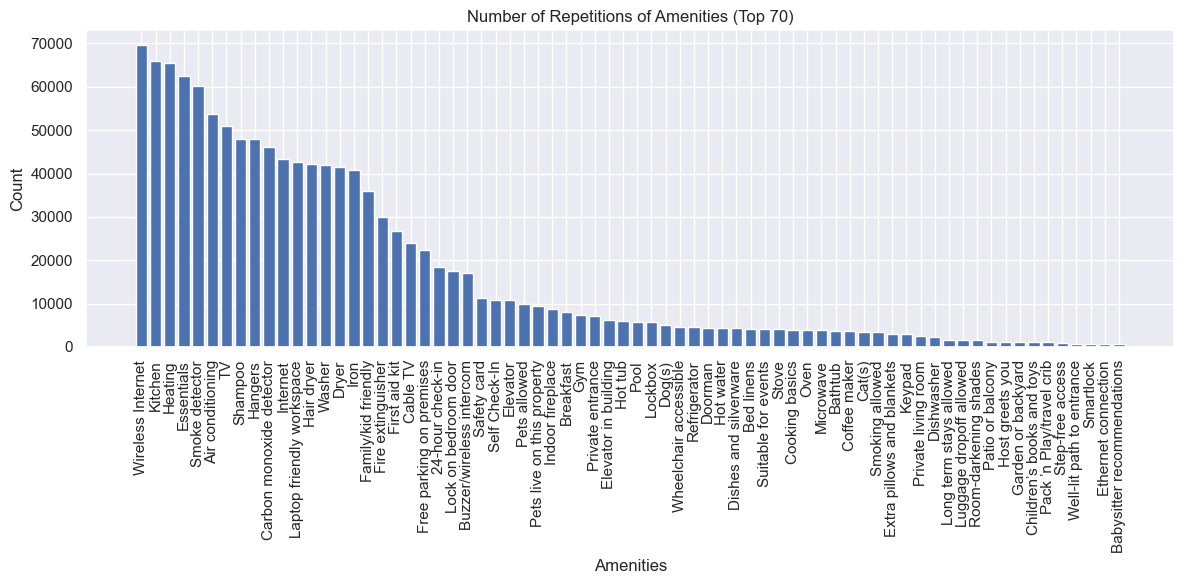

In [1315]:
# Count how many times each feature is passed
amenities_count = {amenity: df['amenities'].apply(lambda x: amenity in x).sum() for amenity in amenities}

# Let's sort the amenities_count by value from most to least
amenities_count_sorted = dict(sorted(amenities_count.items(), key=lambda item: item[1], reverse=True))

# Let's create the x and y values for the chart (in order)
x = list(amenities_count_sorted.keys())[:70]
y = list(amenities_count_sorted.values())[:70]

# Graph creation
plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.xticks(rotation=90)  
plt.xlabel('Amenities')
plt.ylabel('Count')
plt.title('Number of Repetitions of Amenities (Top 70)')
plt.tight_layout()
plt.show()

In [1316]:
#Converting the properties in the column into a table of 1 and 0 values.
amenities_df = pd.DataFrame(df['amenities'].apply(lambda x: [amenity in x for amenity in amenities]).tolist(), columns=amenities, index=df.index)
amenities_df = amenities_df.astype(int)
amenities_df

,Window guards,Wide hallway clearance,Game console,Smoke detector,Carbon monoxide detector,Ethernet connection,Smoking allowed,Dishwasher,Patio or balcony,Luggage dropoff allowed,Lock on bedroom door,Dog(s),Stair gates,Kitchen,Hot water kettle,Baby monitor,Children’s books and toys,Flat,smooth pathway to front door,Private entrance,Fixed grab bars for shower & toilet,Washer / Dryer,Garden or backyard,Private bathroom,Long term stays allowed,Host greets you,Waterfront,Wide doorway,Bathtub with shower chair,Laptop friendly workspace,Firm matress,Toilet paper,Doorman Entry,Bath towel,Doorman,Keypad,Body soap,Free parking on premises,Oven,Internet,Babysitter recommendations,Handheld shower head,Smart lock,Outlet covers,Bed linens,Microwave,Stove,Air conditioning,Hot tub,Baby bath,Other pet(s),Bathtub,TV,Room-darkening shades,Single level home,EV charger,Wide entryway,Children’s dinnerware,Coffee maker,Cleaning before checkout,Changing table,Hair dryer,Wide clearance to shower and toilet,Cable TV,Hand or paper towel,Pets allowed,Pets live on this property,Self Check-In,Family/kid friendly,Free parking on street,Hangers,Buzzer/wireless intercom,Washer,Path to entrance lit at night,Crib,Fire extinguisher,Pool,Table corner guards,Step-free access,Private living room,Smartlock,Paid parking off premises,Shampoo,Cat(s),Wide clearance to shower & toilet,High chair,Roll-in shower with chair,24-hour check-in,Well-lit path to entrance,Hand soap,Wheelchair accessible,Suitable for events,Elevator in building,Lake access,Elevator,Grab-rails for shower and toilet,BBQ grill,Dishes and silverware,Beachfront,Breakfast,Ski in/Ski out,Ground floor access,Other,Indoor fireplace,Gym,Beach essentials,Heating,Air purifier,Disabled parking spot,First aid kit,Hot water,Wide clearance to bed,Firm mattress,Refrigerator,Essentials,Accessible-height bed,Dryer,Iron,Pack ’n Play/travel crib,Flat smooth pathway to front door,Accessible-height toilet,Wireless Internet,Pocket wifi,Cooking basics,Safety card,Fireplace guards,Extra pillows and blankets,Lockbox
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [1317]:
# Take the number of values of each column, count the ones with value count 1 and sort them
value_counts_1 = amenities_df.apply(lambda col: col.value_counts().get(1, 0)).sort_values(ascending=False)

# Let's keep the first 25 columns and drop the remaining columns.
# When we examine the graph, we think that after this value will not affect our analysis.
selected_columns = value_counts_1.index[:24]
amenities_df = amenities_df[selected_columns]

amenities_df

,Wireless Internet,Kitchen,Heating,Essentials,Smoke detector,Air conditioning,TV,Shampoo,Hangers,Carbon monoxide detector,Internet,Laptop friendly workspace,Hair dryer,Washer,Dryer,Iron,Family/kid friendly,Fire extinguisher,First aid kit,Cable TV,Free parking on premises,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom
0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1
3,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1
4,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74107,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,0
74108,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1
74109,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0


In [1318]:
df = pd.concat([df.drop(columns='amenities'), amenities_df], axis=1)
df.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price,Zipcode,review_scores_group,property_type_Apartment,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Condominium,property_type_Dorm,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Wireless Internet,Kitchen,Heating,Essentials,Smoke detector,Air conditioning,TV,Shampoo,Hangers,Carbon monoxide detector,Internet,Laptop friendly workspace,Hair dryer,Washer,Dryer,Iron,Family/kid friendly,Fire extinguisher,First aid kit,Cable TV,Free parking on premises,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom
0,6901257,5.010635,3,1.0,1,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,0,0.943841,2012-03-26,0,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,1,11201.0,1.0,1.0,150.0,11201,NaN,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
1,6304928,5.129899,7,1.0,1,Enjoy travelling during your stay in Manhattan...,2017-08-05,1.0,f,1.000000,2017-06-19,1,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,1,10019.0,3.0,3.0,169.0,10019,"[90.0, 100.0)",True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
2,7919400,4.976734,5,1.0,1,The Oasis comes complete with a full backyard ...,2017-04-30,1.0,0,1.000000,2016-10-25,1,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,1,10027.0,1.0,3.0,145.0,10037,"[90.0, 100.0)",True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1
3,13418779,6.620073,4,1.0,1,This light-filled home-away-from-home is super...,2017-02-28,1.0,0,0.943841,2015-04-19,0,2017-09-14,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,0.0,1,94117.0,2.0,2.0,750.0,94115,"[0.0, 10.0)",False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1
4,3808709,4.744932,2,1.0,1,"Cool, cozy, and comfortable studio located in ...",2015-05-12,1.0,0,1.000000,2015-03-01,1,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,0,20009.0,0.0,1.0,115.0,20010,"[40.0, 50.0)",True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0


* host_since

In [1319]:
# Filters empty values in column 'host_since'
filtered_since = df[df['host_since'].isnull()]
#last review filters out empty values from the filtered values
filtered_since =  filtered_since[filtered_since['last_review'].isnull()]
# Returns whether the values in the selected properties are empty after 2 filters
selected_columns = filtered_since[['first_review', 'host_has_profile_pic', 'host_identity_verified']]

In [1320]:
#As a result of filtering, we drop these rows because the same row is empty in 9 properties.
df = df.drop(filtered_since.index)

Columns not to be feature engineered
beds - review_scores_rating - host_response_rate 

columns to drop
last_review - name

In [1321]:
df.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price,Zipcode,review_scores_group,property_type_Apartment,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Condominium,property_type_Dorm,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Wireless Internet,Kitchen,Heating,Essentials,Smoke detector,Air conditioning,TV,Shampoo,Hangers,Carbon monoxide detector,Internet,Laptop friendly workspace,Hair dryer,Washer,Dryer,Iron,Family/kid friendly,Fire extinguisher,First aid kit,Cable TV,Free parking on premises,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom
0,6901257,5.010635,3,1.0,1,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,0,0.943841,2012-03-26,0,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,1,11201.0,1.0,1.0,150.0,11201,NaN,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
1,6304928,5.129899,7,1.0,1,Enjoy travelling during your stay in Manhattan...,2017-08-05,1.0,f,1.000000,2017-06-19,1,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,1,10019.0,3.0,3.0,169.0,10019,"[90.0, 100.0)",True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
2,7919400,4.976734,5,1.0,1,The Oasis comes complete with a full backyard ...,2017-04-30,1.0,0,1.000000,2016-10-25,1,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,1,10027.0,1.0,3.0,145.0,10037,"[90.0, 100.0)",True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1
3,13418779,6.620073,4,1.0,1,This light-filled home-away-from-home is super...,2017-02-28,1.0,0,0.943841,2015-04-19,0,2017-09-14,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,0.0,1,94117.0,2.0,2.0,750.0,94115,"[0.0, 10.0)",False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1
4,3808709,4.744932,2,1.0,1,"Cool, cozy, and comfortable studio located in ...",2015-05-12,1.0,0,1.000000,2015-03-01,1,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,0,20009.0,0.0,1.0,115.0,20010,"[40.0, 50.0)",True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0


* neighbourhood level

C:\Users\karakurt\AppData\Local\Temp\ipykernel_10600\2698267534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_room'] = (df.log_price) / (df.bedrooms)


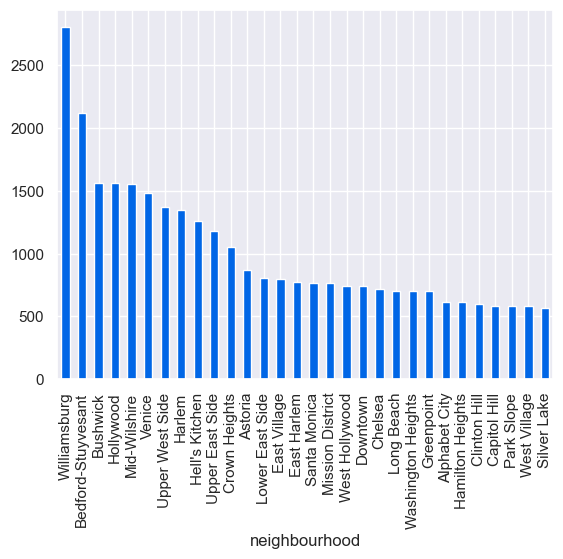

In [1343]:
# Adding price per room field (For neighnourhood price level)
df['price_per_room'] = (df.log_price) / (df.bedrooms)

df.neighbourhood.value_counts().head(30).plot.bar(color=(.0, 0.4, 0.9, 1))

neighbourhood_avg_price = df[['neighbourhood','price_per_room']].groupby('neighbourhood')['price_per_room'].mean().sort_values()



In [1344]:
neighbourhood_avg_price.replace(np.inf, np.nan,inplace=True)
neighbourhood_avg_price.fillna(neighbourhood_avg_price.mean(),inplace=True)

In [1345]:
neighbourhood_class_df = neighbourhood_avg_price.to_frame()
type(neighbourhood_class_df)

pandas.core.frame.DataFrame

In [1346]:

# Converting neighbourhoods to Levels
def neigbourhood_class(row):
  if row['price_per_room'] >=0 and row['price_per_room'] <= 3.631428:
    return 1
  elif row['price_per_room'] > 3.631428 and row['price_per_room'] <= 3.868928:
    return 2
  elif row['price_per_room'] >3.868928 and row['price_per_room'] <= 4.194452: 
    return 3
  else:
    return 4
  
df['neighbourhood_level'] = df.apply(neigbourhood_class,axis=1)

C:\Users\karakurt\AppData\Local\Temp\ipykernel_10600\3366084642.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbourhood_level'] = df.apply(neigbourhood_class,axis=1)


In [1348]:
df.sort_values(by='neighbourhood_level',ascending=True)

,id,log_price,accommodates,bathrooms,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price,Zipcode,review_scores_group,property_type_Apartment,property_type_bed_break,property_type_Bungalow,property_type_Condominium,property_type_Dorm,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_entire_home,room_type_private_room,room_type_shared_room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull_out_Sofa,bed_type_real_Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,wireless_internet,Kitchen,Heating,Essentials,smoke_detector,air_conditioning,TV,Shampoo,Hangers,carbon_monoxide_detector,Internet,laptop_friendly_workspace,hair_dryer,Washer,Dryer,Iron,family_kid_friendly,fire_extinguister,first_aid_kit,cable_tv,free_parking_on_premises,alltime_check_in,lock_on_bedroom_door,"buzzer_wireless,intercom",price_per_room,neighbourhood_level,city
35956,5652946,5.991465,6,2.0,1,Our beautiful row house is located walking dis...,2016-12-31,1.0,0,1.000000,2011-09-11,0,2017-04-14,38.895720,-76.997944,Discover the District,Williamsburg,6,100.0,0,20002.0,3.0,4.0,400.0,20003,NaN,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,1.997155,1,NYC
24223,17734985,5.517453,5,1.0,1,Spacious apartment with 2 large separate bedro...,2016-11-06,1.0,0,0.400000,2016-10-24,0,2017-06-03,40.745732,-74.004712,"Lofty 2 Bedroom, Beautiful Views near Highline",Murray Hill,11,90.0,0,10011.0,2.0,2.0,249.0,10001,"[90.0, 100.0)",True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0,0,2.758726,1,NYC
57453,14315789,5.192957,6,1.0,1,Welcome to Helms Bakery Arthouse! A 1930s Span...,2016-03-31,1.0,0,1.000000,2013-07-16,0,2017-03-29,34.031983,-118.384257,1930s Meets Modern Culver City 3BR,Venice,24,98.0,1,90034.0,3.0,3.0,180.0,90232,"[90.0, 100.0)",False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,True,False,False,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1.730986,1,LA
57455,11478003,3.295837,1,0.0,0,"Hi travelers, we are two young professionals/c...",2017-02-08,1.0,0,0.943841,2015-09-03,0,2015-09-18,33.982313,-118.385673,Nice apartment living room w/t bed!,Upper West Side,0,0.0,1,90230.0,1.0,1.0,27.0,90230,"[0.0, 10.0)",True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,1,1,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.295837,1,NYC
57456,18039612,5.560682,6,3.0,1,Spanish Style home with modern updates! Large...,2017-02-02,1.0,0,1.000000,2011-05-27,0,2017-04-25,33.994624,-118.431999,Westside Modern Oasis 3b/3ba with large Yard,Jamaica,5,100.0,1,90066.0,3.0,3.0,260.0,90066,NaN,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,True,False,False,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,1.853561,1,NYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29850,7368671,5.918894,2,1.0,1,"My place is close to Employees Only, Smalls Ja...",2018-02-10,1.0,f,0.9

In [1349]:
df.drop('price_per_room',axis=1,inplace=True)

C:\Users\karakurt\AppData\Local\Temp\ipykernel_10600\3083961774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('price_per_room',axis=1,inplace=True)


In [1328]:
# Joining between the Main Data Frame and the  neighbourhood_class data frame to get neighbourhood class
#df = df.join(neighbourhood_class_df,on='neighbourhood')
#df = df.merge(neighbourhood_class_df,on='neighbourhood')

In [1357]:
df.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price,Zipcode,review_scores_group,property_type_Apartment,property_type_bed_break,property_type_Bungalow,property_type_Condominium,property_type_Dorm,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_entire_home,room_type_private_room,room_type_shared_room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull_out_Sofa,bed_type_real_Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,wireless_internet,Kitchen,Heating,Essentials,smoke_detector,air_conditioning,TV,Shampoo,Hangers,carbon_monoxide_detector,Internet,laptop_friendly_workspace,hair_dryer,Washer,Dryer,Iron,family_kid_friendly,fire_extinguister,first_aid_kit,cable_tv,free_parking_on_premises,alltime_check_in,lock_on_bedroom_door,"buzzer_wireless,intercom",neighbourhood_level,city
0,6901257,5.010635,3,1.0,1,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,0,0.943841,2012-03-26,0,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,1,11201.0,1.0,1.0,150.0,11201,NaN,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,4,NYC
1,14294502,4.828314,2,1.0,1,Enjoy this spacious room w/ private bath in ou...,2017-01-06,1.0,f,0.943841,2015-05-10,0,2017-07-23,40.692759,-73.996566,Brownstone bedroom w/ private bath,Hell's Kitchen,0,0.0,1,11201.0,1.0,1.0,125.0,11201,"[0.0, 10.0)",1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4,NYC
2,4694625,4.700480,2,1.0,1,My place is close to Brooklyn Heights Promenad...,2016-06-11,1.0,0,0.943841,2016-01-20,0,2016-07-28,40.695112,-73.993405,Cozy Studio in the Heart of Brooklyn Heights,Harlem,3,100.0,0,11201.0,0.0,1.0,110.0,11201,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,4,NYC
3,116951,4.605170,1,1.0,0,Quaint studio in peaceful Brooklyn Heights nei...,2017-10-03,1.0,f,0.943841,2016-02-04,0,2017-09-25,40.692575,-73.993039,Charming Brooklyn Heights Studio,Lower Haight,0,0.0,1,11201.0,0.0,1.0,100.0,11201,"[0.0, 10.0)",1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,4,SF
4,14469019,4.094345,1,1.0,0,Very cozy apartment in one of the most beautif...,2017-09-30,1.0,0,1.000000,2016-06-01,1,2017-09-30,40.693339,-73.999362,Cozy bedroom in Brooklyn Heights - the best of...,Columbia Heights,1,100.0,1,11201.0,1.0,1.0,60.0,11201,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,DC


In [1351]:

# 1. Adım: neighbourhood değerlerini value_counts() ile sıralıyoruz
neighbourhood_counts = df['neighbourhood'].value_counts().sort_values(ascending=False)

# 2. Adım: Her bir neighbourhood için log_price'in minimum, maksimum ve ortalama değerlerini hesaplıyoruz
neighbourhood_stats = df.groupby('neighbourhood')['log_price'].agg(['min', 'max', 'mean'])

In [1352]:
neighbourhood_stats_sorted = neighbourhood_stats.loc[neighbourhood_counts.index]
print(neighbourhood_stats_sorted)

                              min       max      mean
neighbourhood                                        
Williamsburg             0.251989  7.595890  4.801629
Bedford-Stuyvesant       2.708050  7.495542  4.781831
Bushwick                 2.944439  7.598399  4.782727
Hollywood                2.639057  7.467371  4.769359
Mid-Wilshire             2.708050  7.549609  4.821364
...                           ...       ...       ...
South Boston Waterfront  4.976734  4.976734  4.976734
Wilmington               4.727388  4.727388  4.727388
Barry Farm               4.532599  4.532599  4.532599
Todt Hill                4.553877  4.553877  4.553877
Printers Row             3.806662  3.806662  3.806662

[649 rows x 3 columns]


* column drops

* Edit feature name

In [1333]:
df.rename(columns={'property_type_Bed & Breakfast': 'property_type_bed_break'}, inplace=True)
df.rename(columns={'room_type_Entire home/apt': 'room_type_entire_home'}, inplace=True)
df.rename(columns={'room_type_Private room': 'room_type_private_room'}, inplace=True)
df.rename(columns={'room_type_Shared room': 'room_type_shared_room'}, inplace=True)
df.rename(columns={'bed_type_Real Bed': 'bed_type_real_Bed'}, inplace=True)
df.rename(columns={'Wireless Internet': 'wireless_internet'}, inplace=True)
df.rename(columns={'Smoke detector': 'smoke_detector'}, inplace=True)
df.rename(columns={'Air conditioning': 'air_conditioning'}, inplace=True)
df.rename(columns={'Carbon monoxide detector': 'carbon_monoxide_detector'}, inplace=True)
df.rename(columns={'Laptop friendly workspace': 'laptop_friendly_workspace'}, inplace=True)
df.rename(columns={'Hair dryer': 'hair_dryer'}, inplace=True)
df.rename(columns={'Family/kid friendly': 'family_kid_friendly'}, inplace=True)
df.rename(columns={'Fire extinguisher': 'fire_extinguister'}, inplace=True)
df.rename(columns={'First aid kit': 'first_aid_kit'}, inplace=True)
df.rename(columns={'Cable TV': 'cable_tv'}, inplace=True)
df.rename(columns={'Free parking on premises': 'free_parking_on_premises'}, inplace=True)
df.rename(columns={'24-hour check-in': 'alltime_check_in'}, inplace=True)
df.rename(columns={'Lock on bedroom door': 'lock_on_bedroom_door'}, inplace=True)
df.rename(columns={'Buzzer/wireless intercom': 'buzzer_wireless,intercom'}, inplace=True)
df.rename(columns={'bed_type_Pull-out Sofa': 'bed_type_Pull_out_Sofa'}, inplace=True)



In [1356]:
def true_false_to_binary(val):
    if val == True:
        return 1
    elif val == False:
        return 0
    else:
        return val  # Eğer val "True" veya "False" değilse, değeri olduğu gibi döndür

# Fonksiyonu veri çerçevesinin ilgili sütunlarına uygulayarak "True" ve "False" değerlerini 1 ve 0 yapma
binary_cols = ['property_type_Apartment','property_type_bed_break','property_type_Bungalow','property_type_Condominium','property_type_Dorm','property_type_Guesthouse','property_type_House','property_type_Loft','property_type_Other','property_type_Townhouse','cancellation_policy_flexible','cancellation_policy_moderate','cancellation_policy_strict','room_type_entire_home','room_type_private_room','room_type_shared_room','bed_type_Airbed','bed_type_Couch','bed_type_Futon','bed_type_Pull_out_Sofa','bed_type_real_Bed','city_Boston','city_Chicago','city_DC','city_LA','city_NYC','city_SF']
df[binary_cols] = df[binary_cols].applymap(true_false_to_binary)




             id  log_price  accommodates  bathrooms  cleaning_fee   
0       6901257   5.010635             3        1.0             1  \
1      14294502   4.828314             2        1.0             1   
2       4694625   4.700480             2        1.0             1   
3        116951   4.605170             1        1.0             0   
4      14469019   4.094345             1        1.0             0   
...         ...        ...           ...        ...           ...   
72158   4587199   5.501258            12        4.5             1   
72159  16752826   4.317488             2        1.0             1   
72160  10860474   3.912023             2        1.0             1   
72161   1201362   4.499810             4        1.0             1   
72162   1049354   4.382027             3        1.0             1   

                                             description first_review   
0      Beautiful, sunlit brownstone 1-bedroom in the ...   2016-06-18  \
1      Enjoy this spaciou

In [1334]:
df.columns

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'price', 'Zipcode',
       'review_scores_group', 'property_type_Apartment',
       'property_type_bed_break', 'property_type_Bungalow',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Guesthouse', 'property_type_House', 'property_type_Loft',
       'property_type_Other', 'property_type_Townhouse',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'room_type_entire_home',
       'room_type_private_room', 'room_type_shared_room', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull

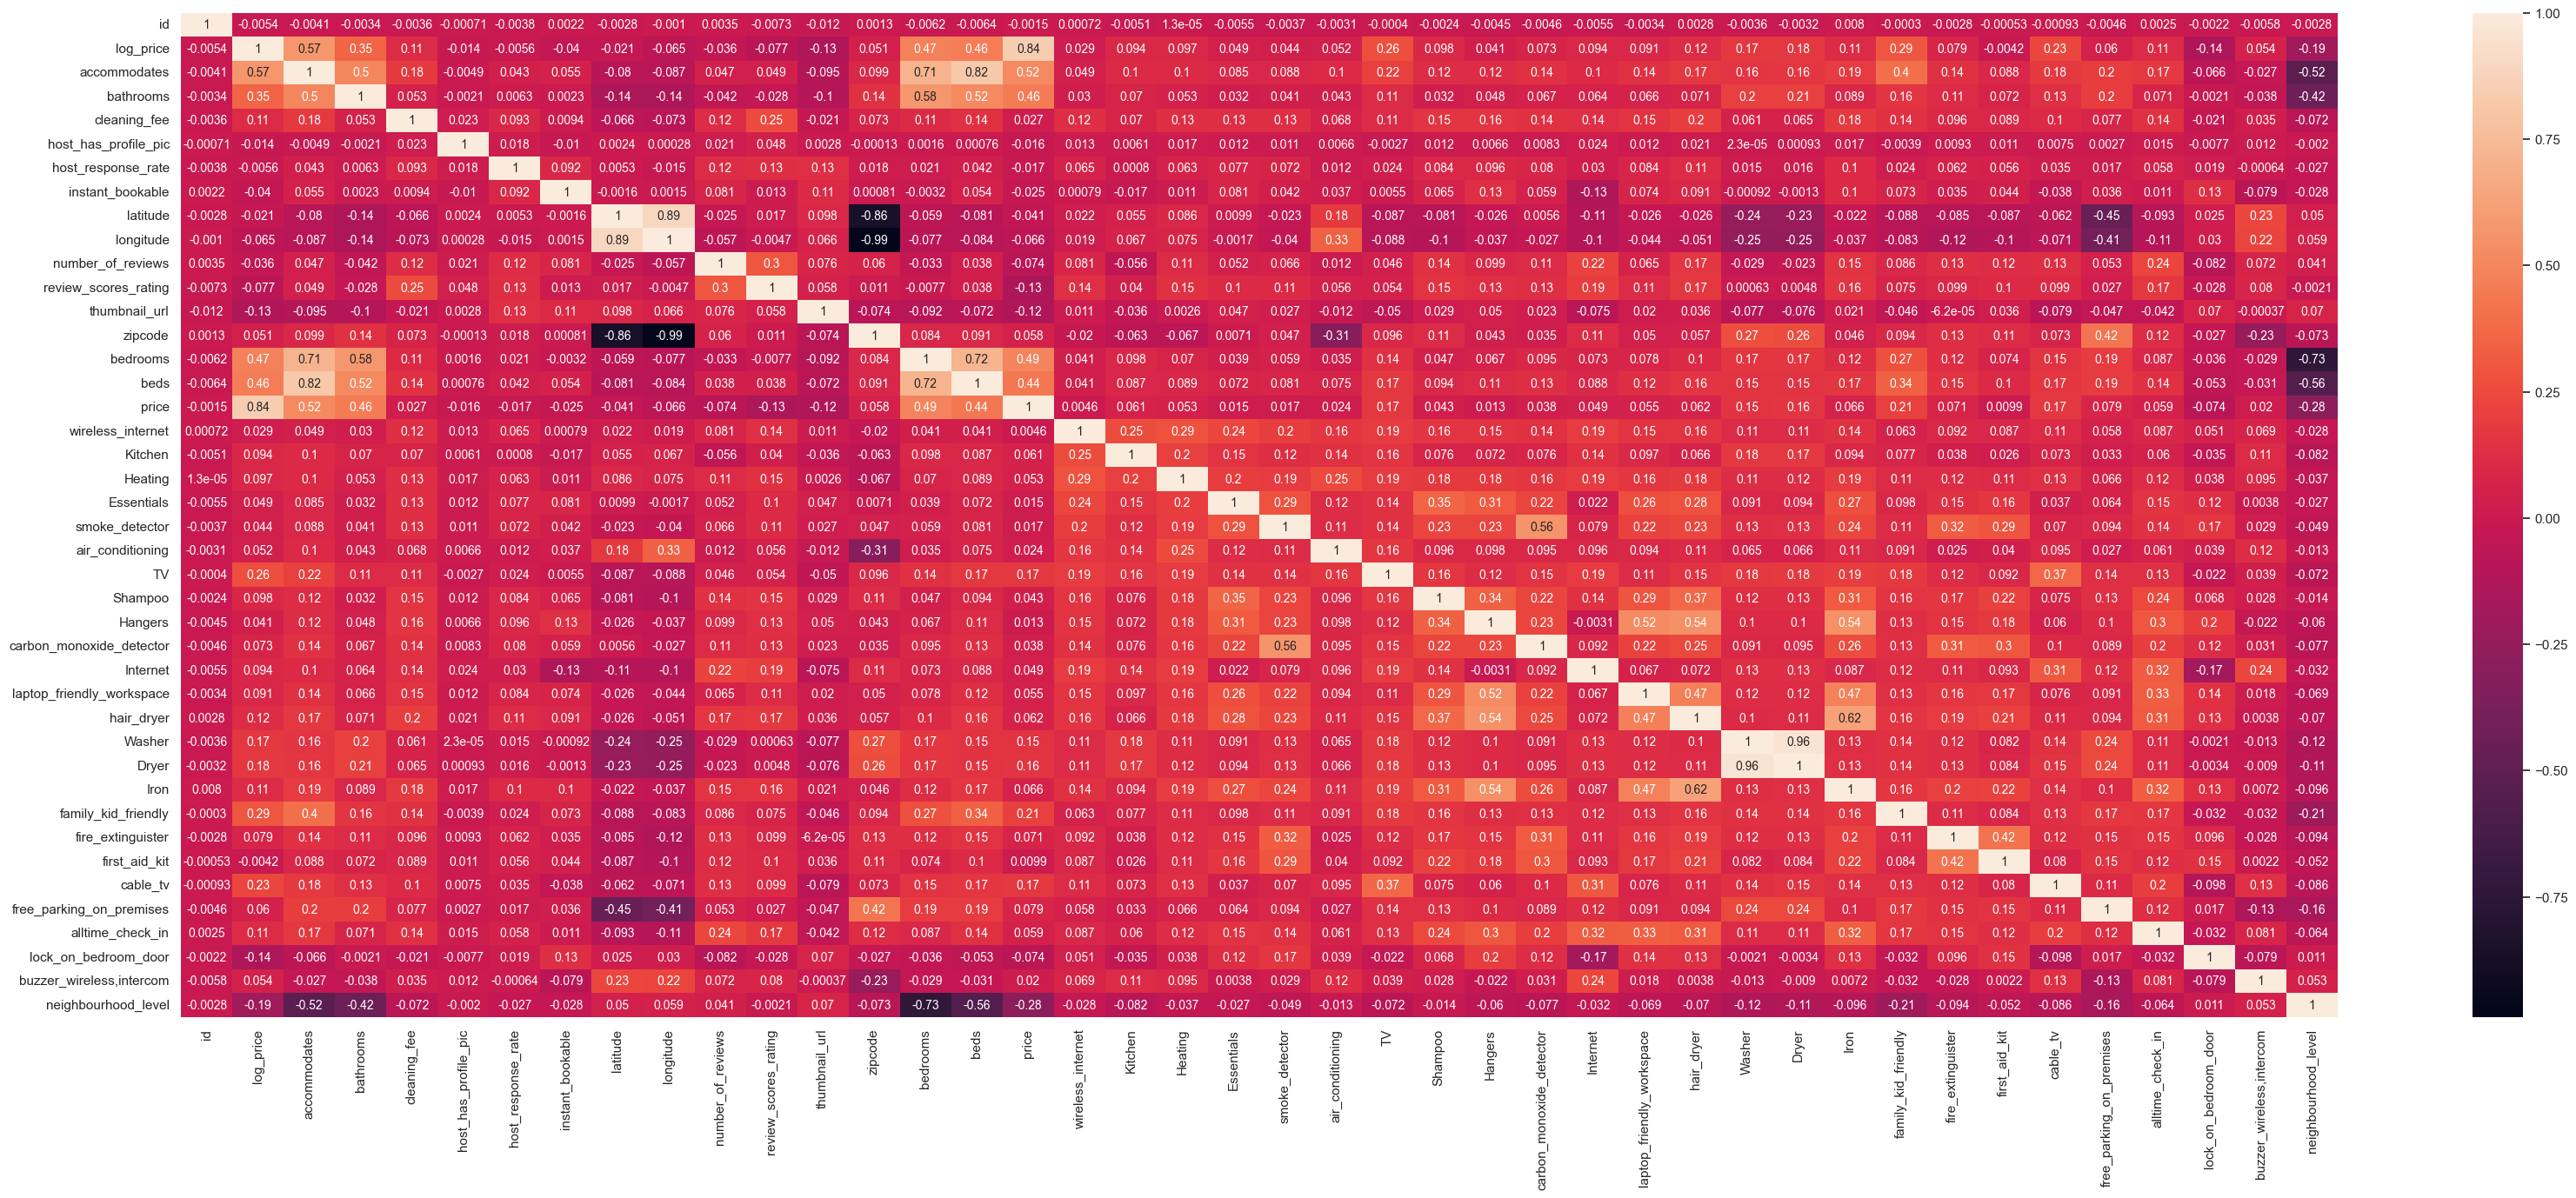

In [1353]:
# Correlation of numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float'])
sns.set(font_scale=1.0)
plt.figure(figsize=(40, 15))
plt.rc('font', size=10)
sns.heatmap(numerical_columns.corr(), annot=True)
plt.show()

In [1359]:
columns_to_drop = ['id','log_price','host_has_profile_pic','host_identity_verified','latitude','longitude', 'name','price','last_review','first_review','description','neighbourhood']
df = df.drop(columns=columns_to_drop)
df.dropna(subset=['neighbourhood'], inplace=True)
df.dropna(subset=['host_since'], inplace=True)

In [1363]:
df.head()

,accommodates,bathrooms,cleaning_fee,host_response_rate,host_since,instant_bookable,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,Zipcode,review_scores_group,property_type_Apartment,property_type_bed_break,property_type_Bungalow,property_type_Condominium,property_type_Dorm,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_entire_home,room_type_private_room,room_type_shared_room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull_out_Sofa,bed_type_real_Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,wireless_internet,Kitchen,Heating,Essentials,smoke_detector,air_conditioning,TV,Shampoo,Hangers,carbon_monoxide_detector,Internet,laptop_friendly_workspace,hair_dryer,Washer,Dryer,Iron,family_kid_friendly,fire_extinguister,first_aid_kit,cable_tv,free_parking_on_premises,alltime_check_in,lock_on_bedroom_door,"buzzer_wireless,intercom",neighbourhood_level
0,3,1.0,1,0.943841,2012-03-26,0,2,100.0,1,11201.0,1.0,1.0,11201,NaN,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,4
1,2,1.0,1,0.943841,2015-05-10,0,0,0.0,1,11201.0,1.0,1.0,11201,"[0.0, 10.0)",1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4
2,2,1.0,1,0.943841,2016-01-20,0,3,100.0,0,11201.0,0.0,1.0,11201,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,4
3,1,1.0,0,0.943841,2016-02-04,0,0,0.0,1,11201.0,0.0,1.0,11201,"[0.0, 10.0)",1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,4
4,1,1.0,0,1.000000,2016-06-01,1,1,100.0,1,11201.0,1.0,1.0,11201,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


8. <a id = "5"></a><br>
# Modeling